In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [ ]:
df=pd.read_csv("titanic.csv")
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#MCAR
df[df["Embarked"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
#Missing not at random
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df=pd.read_csv("titanic.csv",usecols=['Survived','Age','Fare'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [137]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [138]:
median=df['Age'].median()
median

28.0

In [139]:
df["Age_median"]=df['Age'].fillna(median)

In [140]:
df.isna().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

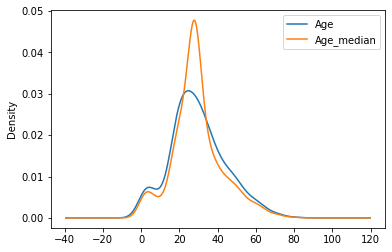

In [141]:
df["Age"].plot(kind='kde')
df["Age_median"].plot(kind='kde')
plt.legend()

In [142]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df['Age'].fillna(median)

In [143]:
impute_nan(df,"Age",median)

In [144]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [145]:
df["Age"].isnull().sum()

177

In [146]:
random_sample=df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

In [147]:
random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [148]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [149]:
random_sample.index=df[df['Age'].isnull()].index

In [150]:
random_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [151]:
df["Age"].isnull()     #to view in different way we should give another df

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [152]:
df[df["Age"].isnull()]

,Survived,Age,Fare,Age_median
5,0,NaN,8.4583,28.0
17,1,NaN,13.0000,28.0
19,1,NaN,7.2250,28.0
26,0,NaN,7.2250,28.0
28,1,NaN,7.8792,28.0
...,...,...,...,...
859,0,NaN,7.2292,28.0
863,0,NaN,69.5500,28.0
868,0,NaN,9.5000,28.0
878,0,NaN,7.8958,28.0


In [153]:
df.loc[df["Age"].isnull(),"Age"]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [154]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [155]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

In [156]:

df.loc[df["Age"].isnull(),"Age"]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [157]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random_sample"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random_sample"]=random_sample

    
    

In [158]:
impute_nan(df,"Age",median)

In [159]:
df

,Survived,Age,Fare,Age_median,Age_random_sample
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


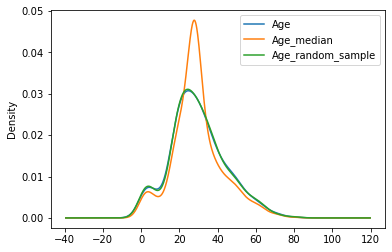

In [160]:
df["Age"].plot(kind='kde')
df["Age_median"].plot(kind='kde')
df["Age_random_sample"].plot(kind="kde")
plt.legend()

In [161]:
df=pd.read_csv("titanic.csv",usecols=['Survived','Age','Fare'])

In [162]:
df["Age"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [163]:
df["Age_nan"]=np.where(df['Age'].isnull(),1,0)
df["Age"].fillna(median,inplace=True)

In [164]:
df["Age_nan"]=np.where(df['Age'].isnull(),1,0)
df["Age"].fillna(df["Age"].median(),inplace=True)

In [165]:
df

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,0
889,1,26.0,30.0000,0


<AxesSubplot:>

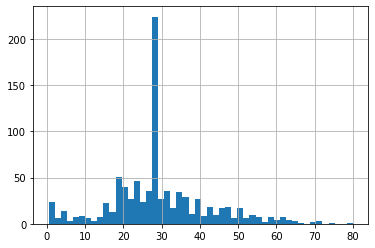

In [166]:
df["Age"].hist(bins=50)

C:\Users\ROHEN\AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

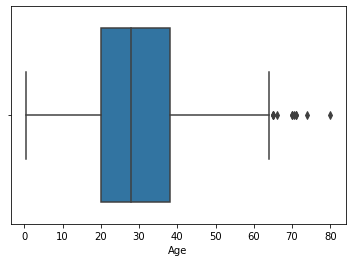

In [167]:
df=pd.read_csv("titanic.csv",usecols=['Survived','Age','Fare'])
sns.boxplot('Age',data=df)
#To check whether outliers are present or not

In [168]:
df["Age"].mean()

29.69911764705882

In [169]:
df["Age"].std()

14.526497332334044

In [170]:
extreme=df["Age"].mean()+3*df["Age"].std()

In [171]:
df["age_extreme"]=df['Age'].fillna(extreme)

In [172]:
df

,Survived,Age,Fare,age_extreme
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,NaN,23.4500,73.27861
889,1,26.0,30.0000,26.00000


C:\Users\ROHEN\AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_extreme'>

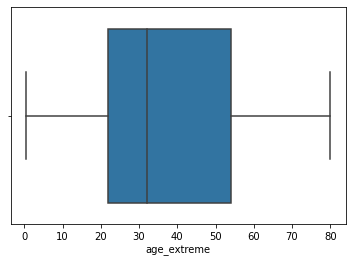

In [173]:
sns.boxplot("age_extreme",data=df)

In [174]:
pd.read_csv("loan.csv")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [175]:
df=pd.read_csv("loan.csv",usecols=["BsmtQual",'FireplaceQu',"GarageType","SalePrice"])

In [176]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [177]:
df['BsmtQual'].mode()[0] #for categorical data we use mode

'TA'

In [178]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

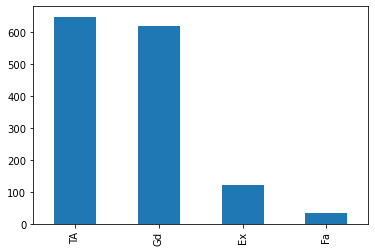

In [179]:
df['BsmtQual'].value_counts().plot.bar()

In [180]:
df['FireplaceQu'].mode()[0]

'Gd'

<AxesSubplot:>

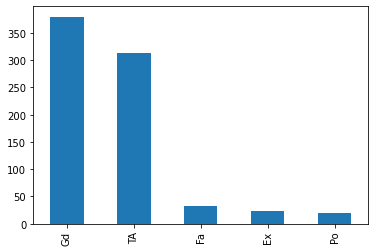

In [181]:
df['FireplaceQu'].value_counts().plot.bar()

In [182]:
df['GarageType'].mode()[0]

'Attchd'

In [183]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:>

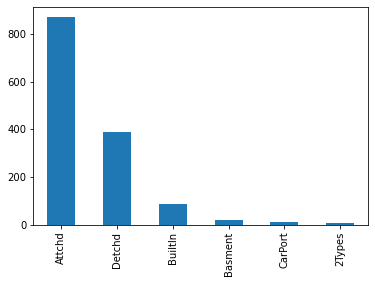

In [184]:
df['GarageType'].value_counts().plot.bar()

In [185]:
df['SalePrice'].value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

<AxesSubplot:>

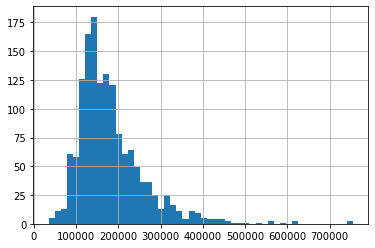

In [186]:
df['SalePrice'].hist(bins=50)

In [187]:
def impute_nan(df,variable):
    mf=df[variable].mode()[0]
    df[variable].fillna(mf,inplace=True)

In [188]:
impute_nan(df,"BsmtQual")
impute_nan(df,"FireplaceQu")



In [189]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Gd,Attchd,142125


<AxesSubplot:>

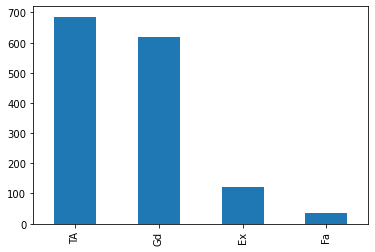

In [190]:
df['BsmtQual'].value_counts().plot.bar()

In [191]:
#df['FireplaceQu'].value_counts().plot.bar()

In [192]:
df=pd.read_csv("loan.csv",usecols=["BsmtQual",'FireplaceQu',"GarageType","SalePrice"])

In [193]:
#To make code better we replace NAN with others
df["FireplaceQu"].fillna("others",inplace=True)

<AxesSubplot:>

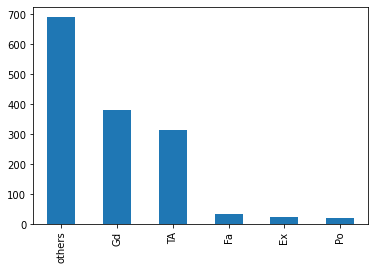

In [194]:
df["FireplaceQu"].value_counts().plot.bar()

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [196]:
df=pd.read_csv("titanic.csv",usecols=['Sex','Embarked'])


In [197]:
df

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [198]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [199]:
pd.get_dummies(df)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [200]:
pd.get_dummies(df['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [201]:
pd.get_dummies(df,columns=['Sex']).head()

,Embarked,Sex_female,Sex_male
0,S,0,1
1,C,1,0
2,S,1,0
3,S,1,0
4,S,0,1


In [202]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [203]:
df.dropna(inplace=True)

In [204]:
df1=pd.get_dummies(df,columns=['Sex','Embarked']).head()
df1.drop(['Embarked_C'],axis=1)


,Sex_female,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,1
1,1,0,0,0
2,1,0,0,1
3,1,0,0,1
4,0,1,0,1


In [205]:
pd.get_dummies(df,columns=['Sex','Embarked']).head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [206]:
pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True).head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


#Onehot Encoding with many categories in a feature

In [207]:
df =pd.read_csv('mercedes.csv')

In [208]:
df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [209]:
df =pd.read_csv('mercedes.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])

In [210]:
df

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [211]:
len(df['X0'].unique())   #find the length of the unique values

47

In [212]:
for i in df.columns:
    print("for column",i,"unique values are:",len(df[i].unique()))

for column X0 unique values are: 47
for column X1 unique values are: 27
for column X2 unique values are: 44
for column X3 unique values are: 7
for column X4 unique values are: 4
for column X5 unique values are: 29
for column X6 unique values are: 12


In [213]:
df['X0'].value_counts().head() # it sorted already

z     360
ak    349
y     324
ay    313
t     306
Name: X0, dtype: int64

In [214]:
df['X0'].value_counts().sort_values(ascending=False).head(10)

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64

In [215]:
lst=df['X0'].value_counts().sort_values(ascending=False).head(10).index

In [216]:
lst

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [217]:
for i in lst:
    df[i]=np.where(df['X0']==i,1,0)

In [218]:
df

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,ay,t,x,o,f,n,w
0,k,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,1,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,1,0,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,0,0,0,0,0,0,0


In [219]:
snd=df['X1'].value_counts().sort_values(ascending=False).head(10).index

In [220]:
snd

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [221]:
for i in snd:
    df[i]=np.where(df['X1']==i,1,0)

In [222]:
df

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,...,w,aa,s,b,l,v,r,i,a,c
0,k,v,at,a,d,u,j,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [223]:
sn=df['X2'].value_counts().sort_values(ascending=False).head(10).index

In [224]:
for i in sn:
    df[i]=np.where(df['X2']==i,1,0)

In [225]:
df

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,...,v,r,i,a,c,as,ae,ai,m,e
0,k,v,at,a,d,u,j,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [226]:
thrd=df['X5'].value_counts().sort_values(ascending=False).head(10).index

In [227]:
for i in thrd:
    df[i]=np.where(df['X5']==i,1,0)

In [228]:
df

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,...,a,c,as,ae,ai,m,e,q,d,p
0,k,v,at,a,d,u,j,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [229]:
frth=df['X6'].value_counts().sort_values(ascending=False).head(10).index

In [230]:
for i in frth:
    df[i]=np.where(df['X6']==i,1,0)

In [231]:
df

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,...,ai,m,e,q,d,p,g,j,h,k
0,k,v,at,a,d,u,j,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,k,t,av,e,d,y,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,az,t,n,f,d,x,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4206,ak,v,r,a,d,aa,g,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [232]:
df.drop(['X0','X1','X2','X5','X6'],axis=1,inplace=True)

In [233]:
df.head(20)

,X3,X4,z,ak,y,ay,t,x,o,f,...,ai,m,e,q,d,p,g,j,h,k
0,a,d,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,e,d,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,c,d,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,f,d,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,f,d,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,c,d,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,f,d,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,f,d,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,e,d,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,c,d,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()   

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
train_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
train_set.drop(0,axis=1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#instead of using usecols we can use this
columns=[1,3,5,6,7,8,9,13]
train_set=train_set[columns]

In [ ]:
train_set

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [ ]:
train_set.columns=['Employment','Degree','Status','Designation','Family_job','Race','Sex','Country']

In [ ]:
train_set

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [ ]:
train_set.columns

Index(['Employment', 'Degree', 'Status', 'Designation', 'Family_job', 'Race',
       'Sex', 'Country'],
      dtype='object')

In [ ]:
train_set.rename({'Status':'Status_1'},axis=1) #here we rename the status to Status_1


,Employment,Degree,Status_1,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [ ]:
len(train_set['Employment'].unique())

9

In [ ]:
len(train_set['Country'].unique())

42

In [ ]:
for feature in train_set.columns:
    print(feature,":",len(train_set[feature].unique()),"Labels")

Employment : 9 Labels
Degree : 16 Labels
Status : 7 Labels
Designation : 15 Labels
Family_job : 6 Labels
Race : 5 Labels
Sex : 2 Labels
Country : 42 Labels


In [ ]:
train_set['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
#converting to dictionary
country_map=train_set['Country'].value_counts().to_dict()

In [ ]:
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [ ]:
train_set['Country']=train_set['Country'].map(country_map)

C:\Users\ROHEN\AppData\Local\Temp/ipykernel_29596/4244281906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country']=train_set['Country'].map(country_map)


In [ ]:
train_set

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,29170
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,29170
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,29170
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,29170


In [3]:
import pandas as pd
df1=pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df1.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [4]:
df1['Cabin'].fillna("Missing",inplace=True)

In [5]:
df1

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
...,...,...
886,0,Missing
887,1,B42
888,0,Missing
889,1,C148


In [6]:
df1['Cabin'].value_counts()

Missing        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [8]:
df1['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [9]:
df1['Cabin']=df1['Cabin'].astype(str).str[0]  #astype is converting all unique labels or names to a string ie., str

In [10]:
df1

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
...,...,...
886,0,M
887,1,B
888,0,M
889,1,C


In [11]:
df1.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [12]:
df1.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [13]:
df1

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
...,...,...
886,0,M
887,1,B
888,0,M
889,1,C


In [14]:
df2=df1.groupby(['Cabin'])['Survived'].mean().sort_values().index
df2

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [15]:
d = dict()
s=0
for i in df2:
    d[i]=s
    s=s+1
print(d)

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}


In [16]:
d={}
for key,value in enumerate(df2,1):
    d[value]=key
print(d)

{'T': 1, 'M': 2, 'A': 3, 'G': 4, 'C': 5, 'F': 6, 'B': 7, 'E': 8, 'D': 9}


In [17]:
df1['Cabin']=df1['Cabin'].map(d)

In [18]:
df1

,Survived,Cabin
0,0,2
1,1,5
2,1,2
3,1,5
4,0,2
...,...,...
886,0,2
887,1,7
888,0,2
889,1,5


In [19]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [20]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [21]:
# Replace the missing value
df['Age'].fillna(df.Age.median(),inplace=True)

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [23]:
#### standarisation: We use the Standardscaler from sklearn library

from sklearn.preprocessing import StandardScaler


In [24]:
scaler = StandardScaler()
### Fit vs fit_transform
df_scaled=scaler.fit_transform(df)

In [25]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

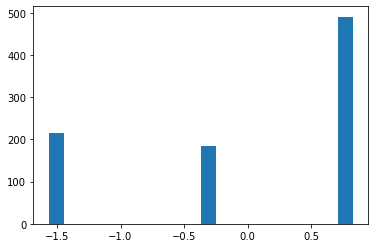

In [27]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

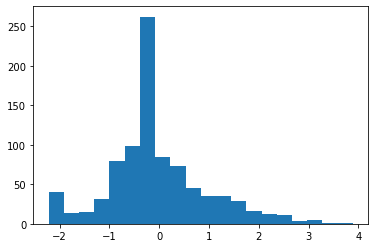

In [28]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

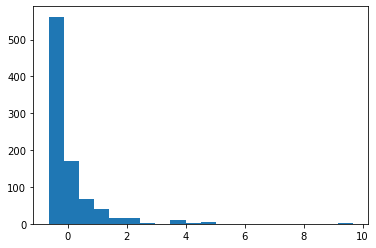

In [29]:
plt.hist(df_scaled[:,3],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

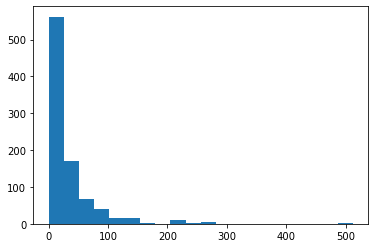

In [30]:
plt.hist(df['Fare'],bins=20)

In [31]:

#Min Max Scaling

In [32]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaler= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

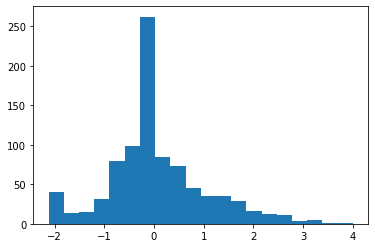

In [33]:
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

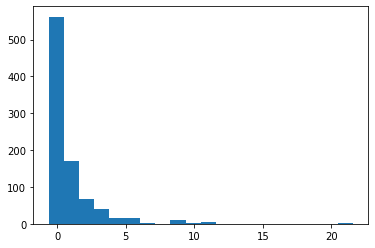

In [34]:
plt.hist(df_robust_scaler['Fare'],bins=20)

In [35]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [37]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [38]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [39]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,28.0,23.4500
889,1,26.0,30.0000


In [40]:
import scipy.stats as stat
import pylab

In [41]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

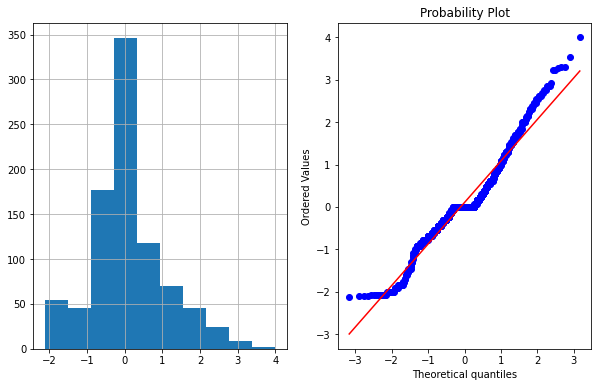

In [42]:
plot_data(df_robust_scaler,'Age')  #scaled data: df_robust_scalar

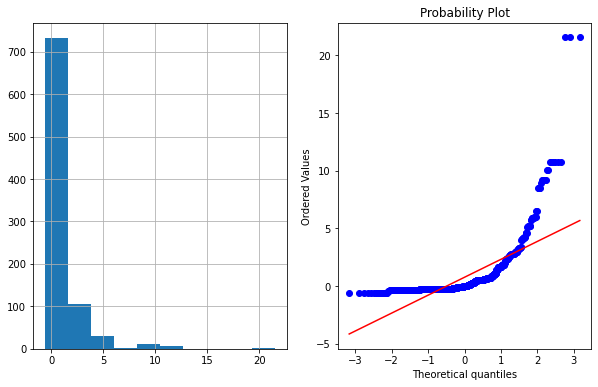

In [43]:
plot_data(df_robust_scaler,'Fare')

# heading
## heading
### heading
#### heading
##### heading

hi

- hi
* hi

### logarithmic Transformation

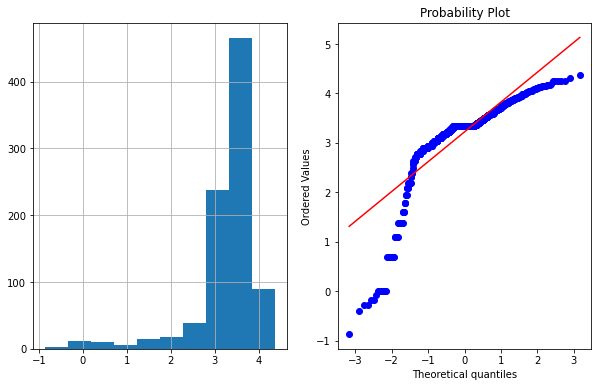

In [44]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

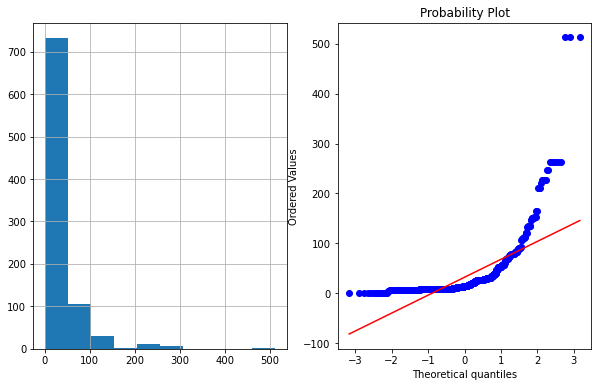

In [45]:
plot_data(df,'Fare')

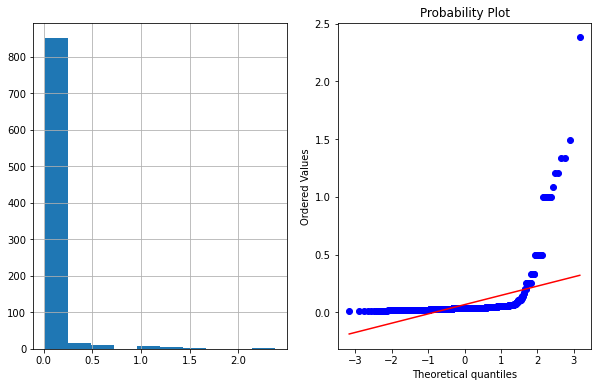

In [46]:
#### Reciprocal Transformation

df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

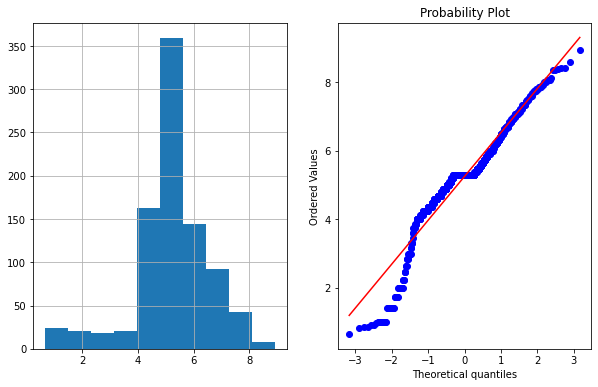

In [47]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

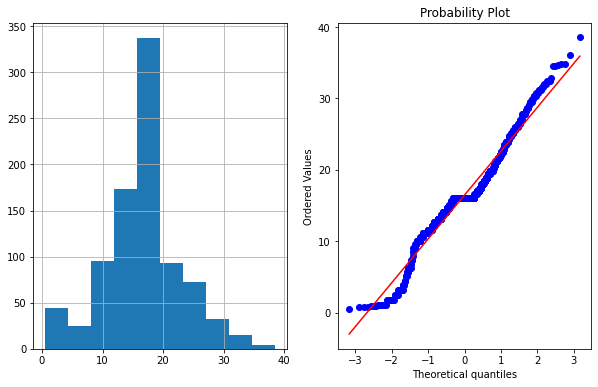

In [48]:
#### Exponential Transformation
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

In [49]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [50]:
print(parameters)

0.7964531473656952


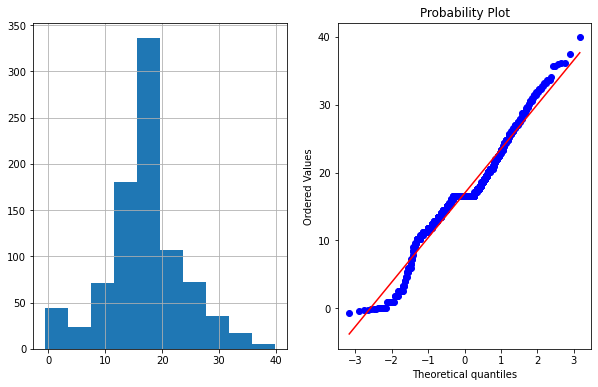

In [51]:
plot_data(df,'Age_Boxcox')

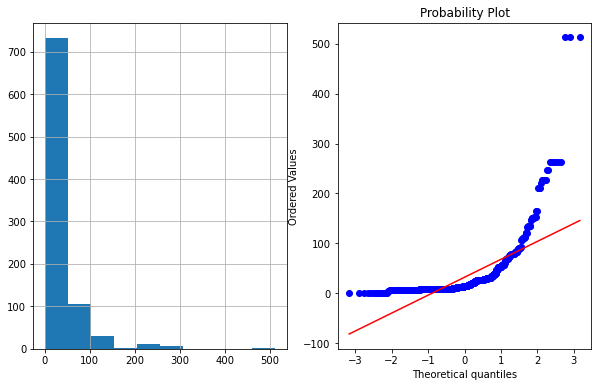

In [52]:
plot_data(df,'Fare')